<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Linear Regression is one of the fundamental models in machine learning. We will study two approaches - gradient descent and the closed form solution.

Let's start by loading a dataset:

In [12]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)

In [13]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [14]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
california.target_names

['MedHouseVal']

In [16]:
df = california.frame

In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We would like to check whether there are any null values in the features.

In [18]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


We would now like to analyze how the variables are correlated with each other and especially the outcome (predicted) variable.

When using techniques like stochastic gradient descent (SGD), it's a good idea to scale the features before proceeding. Let's use the StandardScaler to transform the features. Note that it's generally not necessary to scale the outcome variable.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df['MedHouseVal']
X = df.drop('MedHouseVal', axis=1)
X_scaled = scaler.fit_transform(X)

After scaling the columns in X will have 0 mean and variance of 1.

In [20]:
import pandas as pd
import seaborn as sns
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


<Axes: >

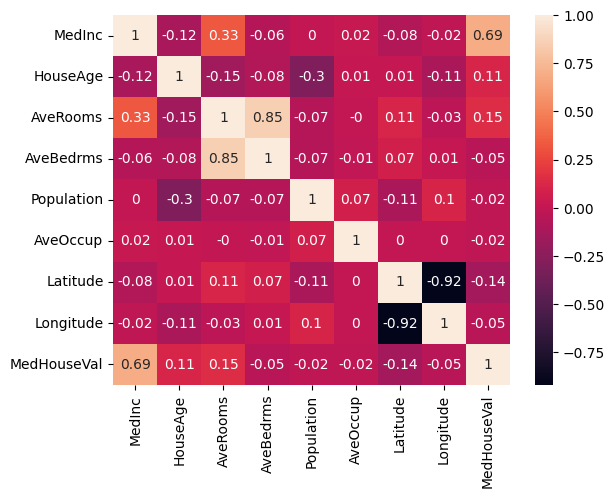

In [21]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Let's choose top 3 variables that are most closely correlated with the MedHouseVal variable

In [22]:
features = ['MedInc', 'AveRooms', 'HouseAge']

In [23]:
X = X_scaled[features]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [25]:
X_train.shape, X_test.shape

((16512, 3), (4128, 3))

Let's create a model using SGDRegressor method of scikit-learn library

In [26]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)

SGDRegressor()

In [27]:
sgd.coef_

array([ 0.83284568, -0.09028247,  0.2253838 ])

In [28]:
sgd.intercept_

array([2.06828164])

Let's calculate some of the evaluation metrics such as R2, MSE, MAE, variance explained, etc

In [29]:
sgd.score(X_test, y_test)

0.5295090866896273

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
mse, mae, ev, r2

(0.6491288055942328,
 0.6037771490360657,
 0.5295883987877791,
 0.5295090866896273)

# OLS Using StatsModels Library

We have used SGDRegressor and obtained a fair model. Try to add more variables and see if you get a better result.

We will now try to use the statsmodel library to build a regression model and obtain more diagnostics.

In [32]:
import statsmodels.api as sm

In [33]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [34]:
features = ['MedInc', 'AveRooms', 'HouseAge']

In [35]:
X = X[features]

In [36]:
X.head()

,MedInc,AveRooms,HouseAge
0,8.3252,6.984127,41.0
1,8.3014,6.238137,21.0
2,7.2574,8.288136,52.0
3,5.6431,5.817352,52.0
4,3.8462,6.281853,52.0


In [37]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [38]:
X = sm.add_constant(X)

In [39]:
X.head()

,const,MedInc,AveRooms,HouseAge
0,1.0,8.3252,6.984127,41.0
1,1.0,8.3014,6.238137,21.0
2,1.0,7.2574,8.288136,52.0
3,1.0,5.6431,5.817352,52.0
4,1.0,3.8462,6.281853,52.0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [41]:
mod = sm.OLS(y_train, X_train)

In [42]:
res = mod.fit()

In [43]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     5674.
Date:                Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:29:48   Log-Likelihood:                -19868.
No. Observations:               16512   AIC:                         3.974e+04
Df Residuals:                   16508   BIC:                         3.977e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.025      0.665      0.5

In [44]:
y_test_predict = res.predict(X_test)

In [45]:
sm.tools.eval_measures.rmse(y_test, y_test_predict)

0.8062990087498703

Things to consider and implement
- Try adding more variables (predictors) to the model and see if R^2 or F-statistic go up
- Check if the relationship between dependent and independent variables is linear or not

# Other Datasets

Next, apply the approach that we used earlier to other datasets, such as the built-in diabetes dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

and other datasets from UCI ML repository.